In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
df = pd.read_csv('./complete_trips_data_2023.csv')
df.drop('Unnamed: 0', inplace=True, axis = 1)
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
df.drop('date', inplace=True, axis=1)



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305701 entries, 0 to 1305700
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   ride_id             1305701 non-null  object        
 1   rideable_type       1305701 non-null  object        
 2   started_at          1305701 non-null  datetime64[ns]
 3   ended_at            1305701 non-null  datetime64[ns]
 4   start_station_name  1305701 non-null  object        
 5   start_station_id    1305701 non-null  object        
 6   end_station_name    1305701 non-null  object        
 7   end_station_id      1305701 non-null  object        
 8   start_lat           1305701 non-null  float64       
 9   start_lng           1305701 non-null  float64       
 10  end_lat             1305701 non-null  float64       
 11  end_lng             1305701 non-null  float64       
 12  member_casual       1305701 non-null  object        
 13  season      

### Adding a duration in minutes column and reindexing columns

In [4]:
df['duration_minutes'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

In [5]:
df = df.reindex(columns=['ride_id', 'rideable_type', 'started_at', 'ended_at', 'duration_minutes',  'trip_distance', 'start_station_id', 'start_station_name', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'season', 'AvgTemp', 'member_casual' ])

In [6]:
df.head()

,ride_id,rideable_type,started_at,ended_at,duration_minutes,trip_distance,start_station_id,start_station_name,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,season,AvgTemp,member_casual
0,0093AA5E7E3E0158,docked_bike,2023-04-13 13:49:59,2023-04-13 13:55:04,5.083333,0.324752,A32011,Innovation Lab - 125 Western Ave at Batten Way,Soldiers Field Park - 111 Western Ave,A32006,42.363713,-71.124598,42.364263,-71.118276,spring,68.5,member
1,BFA8B88E063688F4,docked_bike,2023-04-25 09:44:38,2023-04-25 09:51:28,6.833333,0.716256,M32045,Museum of Science,One Broadway / Kendall Sq at Main St / 3rd St,M32003,42.367690,-71.071163,42.362242,-71.083111,spring,51.5,member
2,A9C51FA200C31A81,docked_bike,2023-04-24 18:39:31,2023-04-24 18:58:05,18.566667,2.627298,D32001,New Balance - 20 Guest St,HMS/HSPH - Avenue Louis Pasteur at Longwood Ave,B32003,42.357329,-71.146735,42.337417,-71.102861,spring,51.5,casual
3,0C1D451797FF0871,docked_bike,2023-04-04 19:25:31,2023-04-04 19:32:14,6.716667,0.859087,M32045,Museum of Science,Gore Street at Lambert Street,M32081,42.367690,-71.071163,42.373080,-71.086342,spring,48.5,member
4,DDDCD0A2D2EE7A37,docked_bike,2023-04-11 08:36:14,2023-04-11 08:52:39,16.416667,1.607524,M32045,Museum of Science,Columbus Ave at W. Canton St,C32077,42.367690,-71.071163,42.344742,-71.076482,spring,61.5,member


# **Categorical Analysis**

/var/folders/jb/rytm79zx10zcs2wb4zr2ptxr0000gn/T/ipykernel_81730/2231089708.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=each, data=df, palette='viridis')


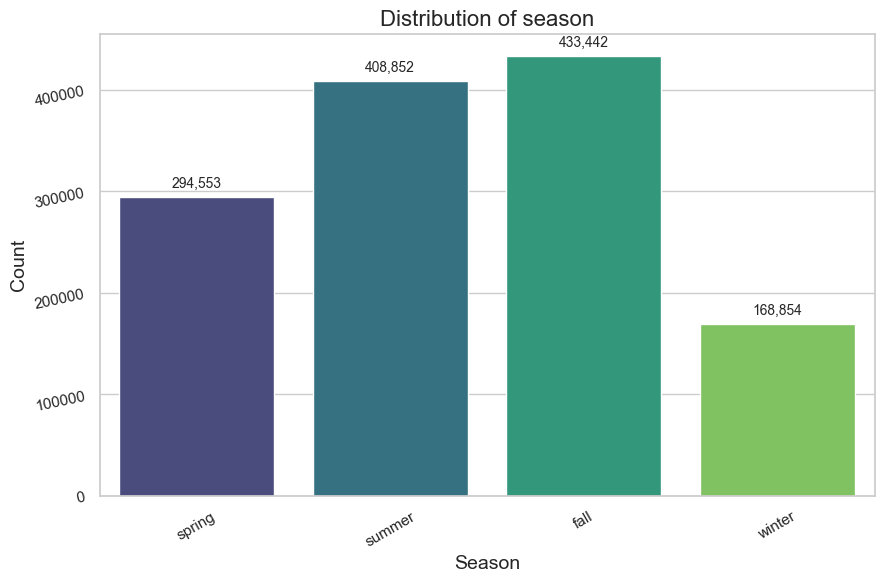

/var/folders/jb/rytm79zx10zcs2wb4zr2ptxr0000gn/T/ipykernel_81730/2231089708.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=each, data=df, palette='viridis')


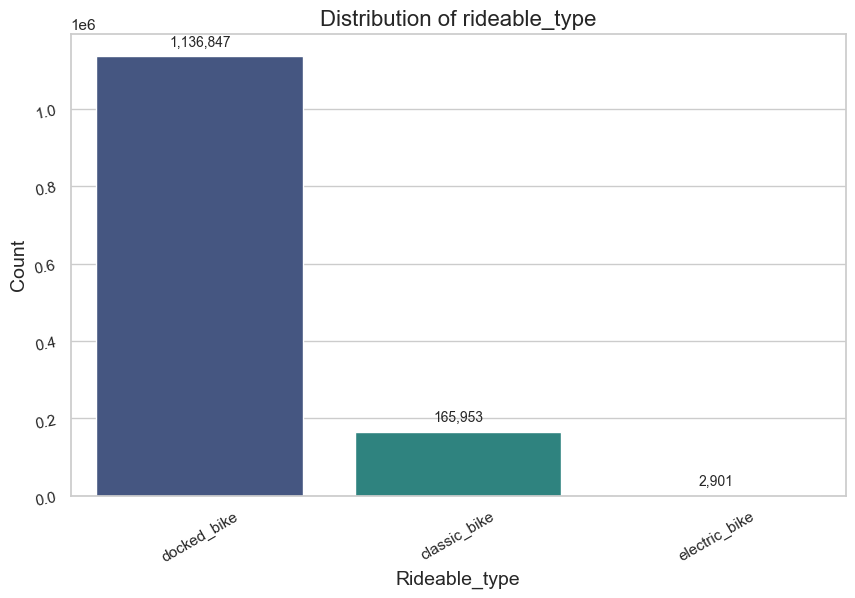

/var/folders/jb/rytm79zx10zcs2wb4zr2ptxr0000gn/T/ipykernel_81730/2231089708.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=each, data=df, palette='viridis')


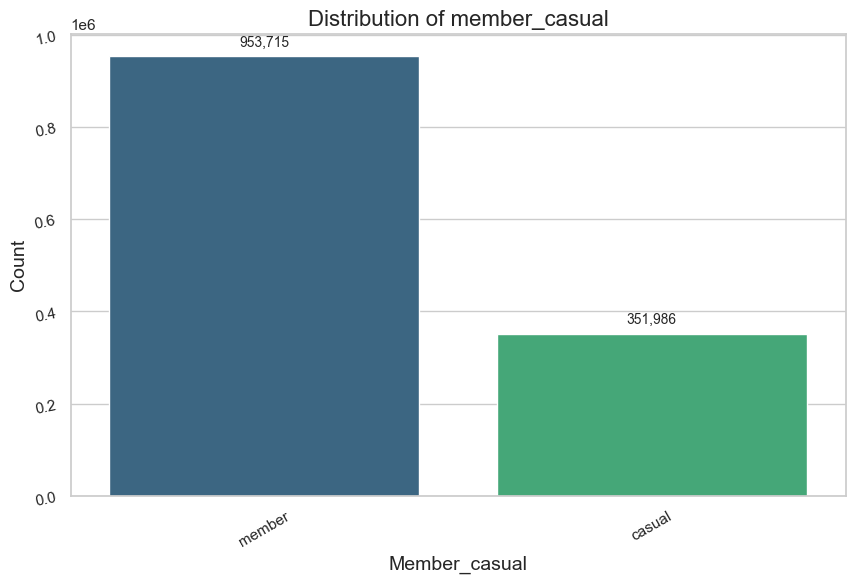

In [7]:
sns.set(style='whitegrid')

categorical = ['season', 'rideable_type', 'member_casual']

for each in categorical:
    plt.figure(figsize=(10,6))
    ax = sns.countplot(x=each, data=df, palette='viridis')    
    plt.title(f'Distribution of {each}', fontsize=16)
    plt.xlabel(each.capitalize(), fontsize=14)
    plt.ylabel('Count', fontsize=14)
    ax.tick_params(axis='x', rotation=30)
    ax.tick_params(axis='y', rotation=12)
    
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,.0f}',  # Format the count as a comma-separated number
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points',
                    fontsize=10)
    
    
    
    plt.show()


### **It is evident that most of the rides happen in Summer and Fall, and the riders are members who use Docked bikes as their main bike type.** 

# **Temporal Analysis**

In [8]:
df['start_hour'] = df['started_at'].dt.hour
df['end_hour'] = df['started_at'].dt.hour
df['start_day'] = df['started_at'].dt.dayofweek # Monday=0, Sunday=6
df['start_month'] = df['started_at'].dt.month

### Hourly Usage on Different Days of The Week

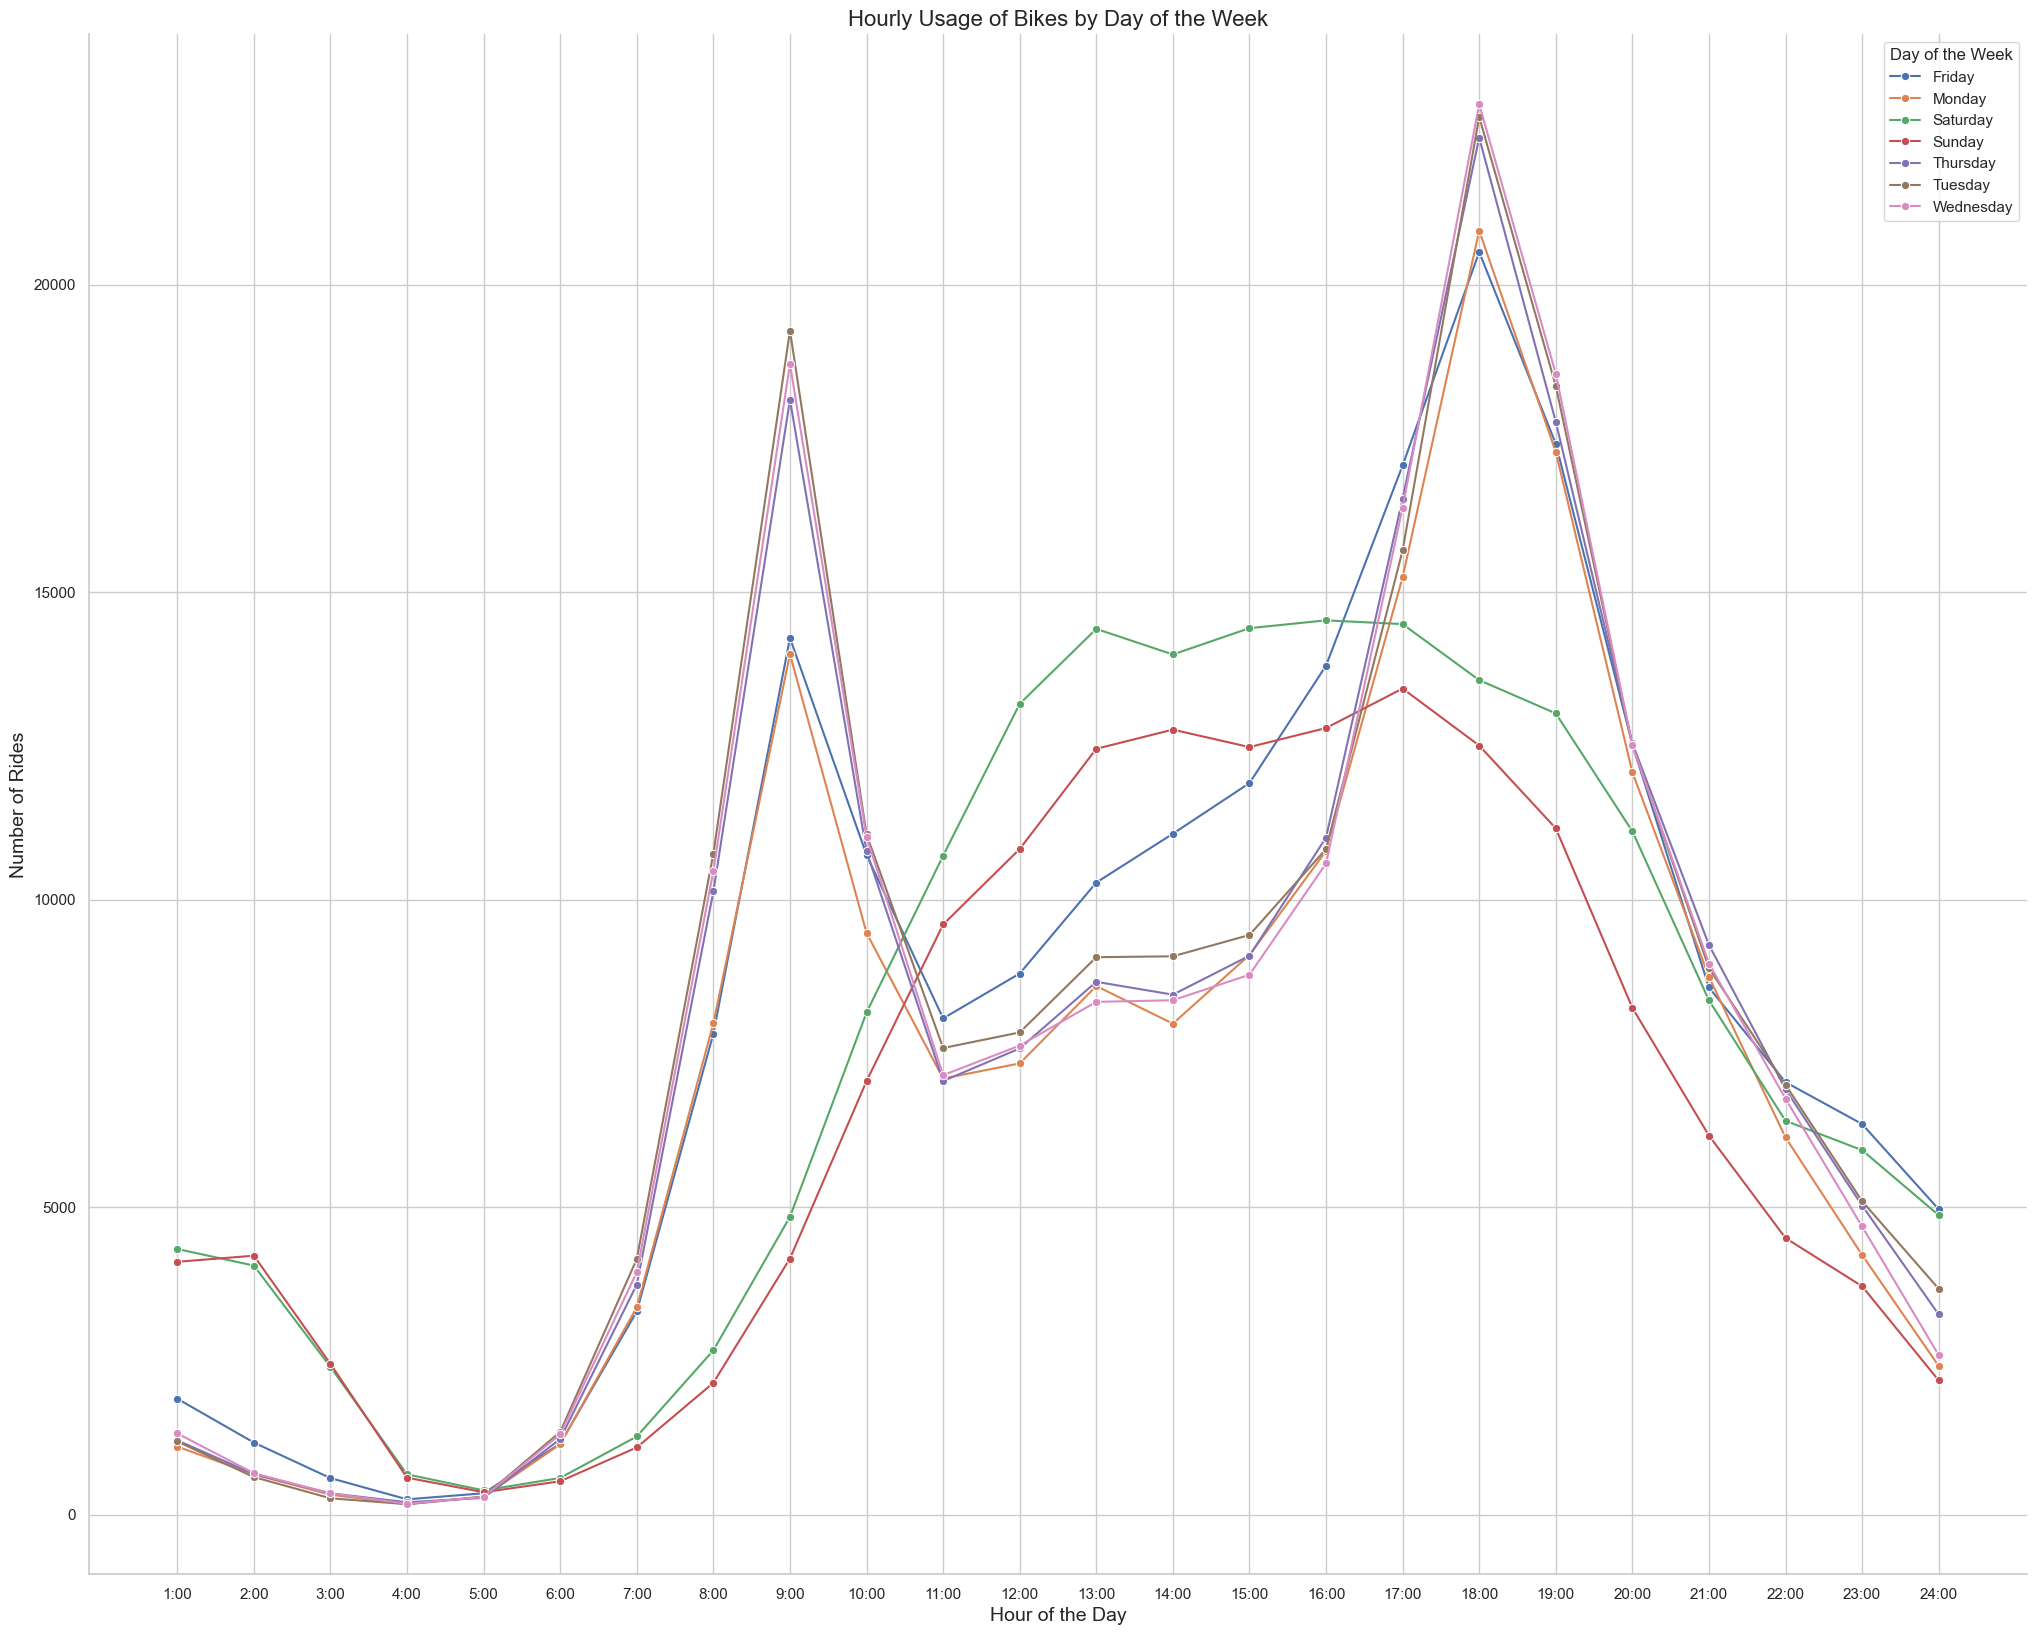

In [9]:
# Convert 'started_at' to day of the week
df['start_day_of_week'] = df['started_at'].dt.day_name()

# Aggregate data
hourly_weekday_counts = df.groupby(['start_hour', 'start_day_of_week'])['ride_id'].count().reset_index(name='count')

# Plot
plt.figure(figsize=(25,20))
sns.lineplot(data=hourly_weekday_counts, x='start_hour', y='count', hue='start_day_of_week', marker='o')
plt.title('Hourly Usage of Bikes by Day of the Week', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Rides', fontsize=14)
plt.xticks(range(0, 24), labels=[f"{i}:00" for i in range(1, 25)])
plt.legend(title='Day of the Week')
sns.despine()
plt.grid(True)
plt.show()


### - It appears that there are distinct peaks in bike usage during the daytime hours across all days of the week, with the 2 highest peaks generally occurring in the morning at 9:00AM and early evening, around 18:00 (6 PM). 
### - There's a noticeable pattern of increased usage on weekdays during typical commuting hours (morning and late afternoon), **which may suggest a significant use of bikes for work commutes.** 
### - **On weekends**, the distribution is more spread out throughout the day with a later peak, which could **indicate more recreational or non-commuting use**. 
### - Additionally, the lowest usage appears to occur in the very early hours of the morning across all days, which is expected as this would be outside of typical commuting or recreational activity hours.

/var/folders/jb/rytm79zx10zcs2wb4zr2ptxr0000gn/T/ipykernel_81730/2843061141.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.groupby('start_day').size().index, y=df.groupby('start_day').size().values, palette='muted')


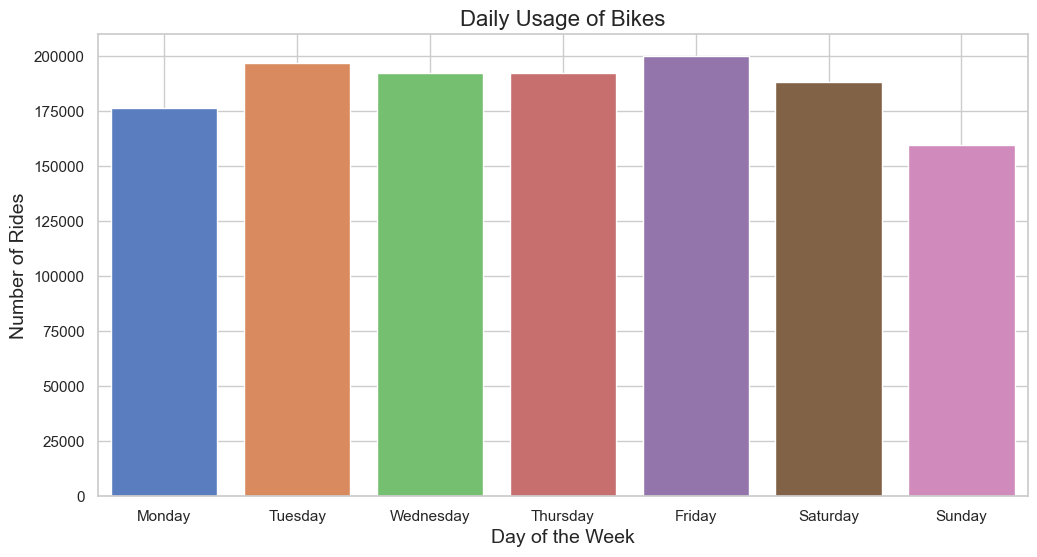

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df.groupby('start_day').size().index, y=df.groupby('start_day').size().values, palette='muted')
plt.title('Daily Usage of Bikes', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Rides', fontsize=14)
plt.xticks(ticks=range(0, 7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(True)

plt.show()


### It can be seen that the distribution of the number of bike rides over the week is not much varied. It decreases over the weekend as expected. What's surprising is the number of bike rides on `Monday`, these rides should be closely matching the number of rides on the other days of the week (except the weekend) but they are less approxiamtely 20,000 less. 

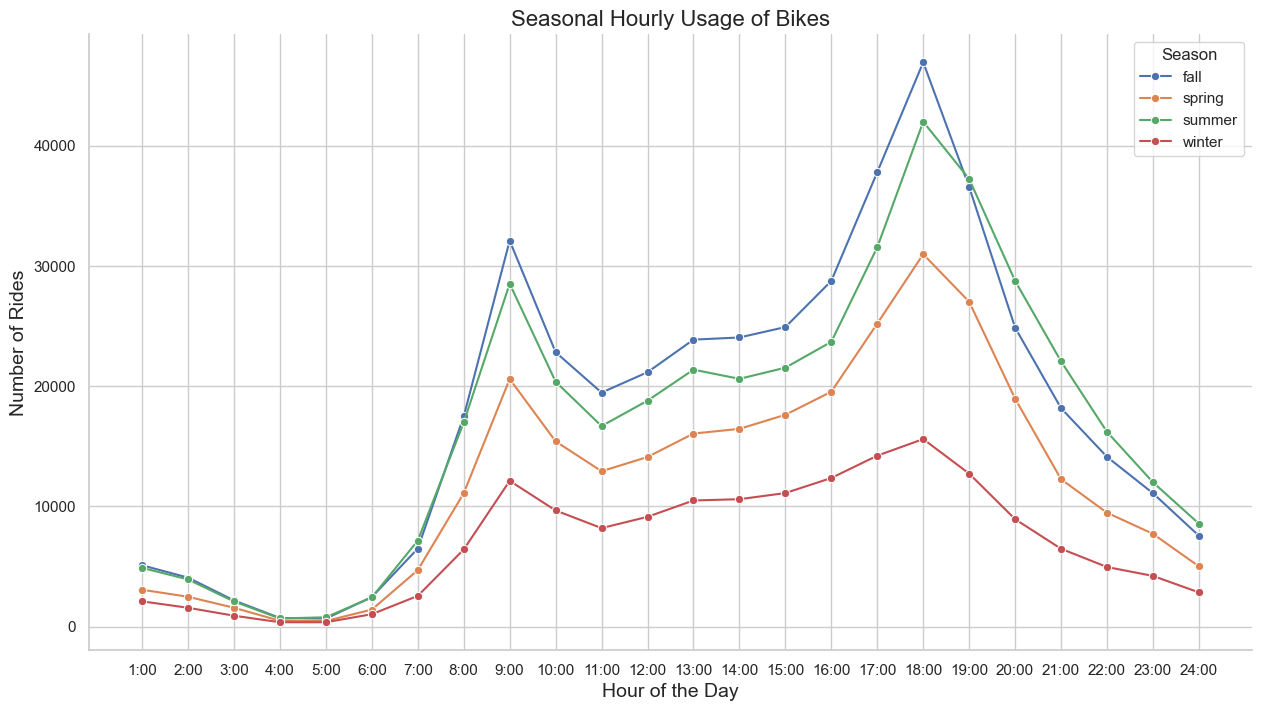

In [11]:
# Aggregate data by hour and season
seasonal_hourly_counts = df.groupby(['start_hour', 'season'])['ride_id'].count().reset_index(name='count')

# Plot
plt.figure(figsize=(15, 8))
sns.lineplot(data=seasonal_hourly_counts, x='start_hour', y='count', hue='season', marker='o')
plt.title('Seasonal Hourly Usage of Bikes', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Rides', fontsize=14)
plt.xticks(range(0, 24), labels=[f"{i}:00" for i in range(1, 25)])
plt.legend(title='Season')
sns.despine()
plt.grid(True)
plt.show()


### This plot confirms that indeed the most busy time's of the year are summer and fall

### **Most Taken Routes**

In [12]:
top_routes = df.groupby(['start_station_name', 'end_station_name']).size().reset_index(name='count')

In [13]:
top_100_routes = top_routes.sort_values('count', ascending=False).head(100)
top_100_routes

,start_station_name,end_station_name,count
19068,Central Square at Mass Ave / Essex St,MIT Pacific St at Purrington St,1483
49479,MIT at Mass Ave / Amherst St,MIT Vassar St,1439
49353,MIT at Mass Ave / Amherst St,Central Square at Mass Ave / Essex St,1398
38373,Harvard Square at Mass Ave/ Dunster,Harvard University Radcliffe Quadrangle at She...,1389
49305,MIT at Mass Ave / Amherst St,Beacon St at Massachusetts Ave,1378
...,...,...,...
77458,Washington St at Lenox St,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,481
12897,Brigham Circle - Francis St at Huntington Ave,Forsyth St at Huntington Ave,479
58850,Park Dr at Buswell St,Commonwealth Ave at Agganis Way,471
24054,Commonwealth Ave at Agganis Way,Park Dr at Buswell St,471


In [14]:
import folium
import branca.colormap as cm

# Initializing a map centered around Boston
boston_map = folium.Map(location=[42.3601, -71.0589], zoom_start=13)

# Generating a color palette
color_palette = cm.linear.YlGnBu_09.scale(0, top_100_routes['count'].max())
top_100_routes['color'] = top_100_routes['count'].apply(color_palette)

# Adding lines to the map for the top 100 routes with labels and tooltips
for idx, row in top_100_routes.iterrows():
    start_station = df[df['start_station_name'] == row['start_station_name']].iloc[0]
    end_station = df[df['end_station_name'] == row['end_station_name']].iloc[0]
    start_coords = [start_station['start_lat'], start_station['start_lng']]
    end_coords = [end_station['end_lat'], end_station['end_lng']]
    
    # Tooltip and popup
    tooltip = f"Route from {start_station['start_station_name']} to {end_station['end_station_name']}"
    popup = folium.Popup(f"{row['count']} rides", parse_html=True)

    # Drawing the lines with colors based on count
    folium.PolyLine(
        locations=[start_coords, end_coords],
        color=row['color'],
        weight=2.5,
        opacity=0.8,
        tooltip=tooltip,
        popup=popup
    ).add_to(boston_map)

# Adding the color legend
color_palette.caption = 'Number of Rides'
boston_map.add_child(color_palette)

# Saving to an HTML file -- Please open this in a browser for an interactive map, you can hover over the routes for info on their respective stations
boston_map.save('top_100_bike_routes_enhanced.html')


In [15]:
from folium.plugins import HeatMap

# Create a map centered around Boston
map_boston = folium.Map(location=[42.3601, -71.0589], zoom_start=13)

# Heatmap for start stations
start_coords = df[['start_lat', 'start_lng']].dropna()
HeatMap(data=start_coords, radius=15).add_to(map_boston)

# Heatmap for end stations
end_coords = df[['end_lat', 'end_lng']].dropna()
HeatMap(data=end_coords, radius=15).add_to(map_boston)

# Display the map
map_boston.save('boston_bike_stations_heatmap.html')


In [16]:
len(df['start_station_id'].unique()) 

491

In [17]:
len(df['end_station_id'].unique())

491

In [18]:
# Extract unique start stations
start_stations = df[['start_station_id', 'start_station_name', 'start_lat', 'start_lng']].drop_duplicates()

# Rename columns for uniformity
start_stations.columns = ['station_id', 'station_name', 'lat', 'lng']

# Extract unique end stations
end_stations = df[['end_station_id', 'end_station_name', 'end_lat', 'end_lng']].drop_duplicates()

# Rename columns for uniformity
end_stations.columns = ['station_id', 'station_name', 'lat', 'lng']

# Combine and remove any duplicates
stations_df = pd.concat([start_stations, end_stations]).drop_duplicates(subset=['station_id'])



In [19]:
stations_df

,station_id,station_name,lat,lng
0,A32011,Innovation Lab - 125 Western Ave at Batten Way,42.363713,-71.124598
1,M32045,Museum of Science,42.367690,-71.071163
2,D32001,New Balance - 20 Guest St,42.357329,-71.146735
5,S32047,Foley St at Grand Union Blvd,42.393018,-71.080717
6,E32008,Centre St at Seaverns Ave,42.312120,-71.114298
...,...,...,...,...
1142552,S32051,Foss Park 2 (temp for winter),42.390509,-71.089455
1143828,F32008,Logan Park,42.418007,-71.096572
1147449,E32015,Lincoln St at Empire St,42.357651,-71.128513
1148096,S32053,Chestnut St at Poplar St,42.377636,-71.085954


In [20]:
df.head()

,ride_id,rideable_type,started_at,ended_at,duration_minutes,trip_distance,start_station_id,start_station_name,end_station_name,end_station_id,...,end_lat,end_lng,season,AvgTemp,member_casual,start_hour,end_hour,start_day,start_month,start_day_of_week
0,0093AA5E7E3E0158,docked_bike,2023-04-13 13:49:59,2023-04-13 13:55:04,5.083333,0.324752,A32011,Innovation Lab - 125 Western Ave at Batten Way,Soldiers Field Park - 111 Western Ave,A32006,...,42.364263,-71.118276,spring,68.5,member,13,13,3,4,Thursday
1,BFA8B88E063688F4,docked_bike,2023-04-25 09:44:38,2023-04-25 09:51:28,6.833333,0.716256,M32045,Museum of Science,One Broadway / Kendall Sq at Main St / 3rd St,M32003,...,42.362242,-71.083111,spring,51.5,member,9,9,1,4,Tuesday
2,A9C51FA200C31A81,docked_bike,2023-04-24 18:39:31,2023-04-24 18:58:05,18.566667,2.627298,D32001,New Balance - 20 Guest St,HMS/HSPH - Avenue Louis Pasteur at Longwood Ave,B32003,...,42.337417,-71.102861,spring,51.5,casual,18,18,0,4,Monday
3,0C1D451797FF0871,docked_bike,2023-04-04 19:25:31,2023-04-04 19:32:14,6.716667,0.859087,M32045,Museum of Science,Gore Street at Lambert Street,M32081,...,42.373080,-71.086342,spring,48.5,member,19,19,1,4,Tuesday
4,DDDCD0A2D2EE7A37,docked_bike,2023-04-11 08:36:14,2023-04-11 08:52:39,16.416667,1.607524,M32045,Museum of Science,Columbus Ave at W. Canton St,C32077,...,42.344742,-71.076482,spring,61.5,member,8,8,1,4,Tuesday


In [30]:
average_dist = df['trip_distance'].mean()

print(f'The average trip distance is {average_dist.round(2)} miles')


The average trip distance is 1.24 miles


In [23]:
from scipy.spatial import distance_matrix

coordinates = stations_df[['lat', 'lng']]

# Calculate the distance matrix for all stations
dist_matrix = distance_matrix(coordinates, coordinates)

# Replace 0s with np.nan to ignore self-distances
np.fill_diagonal(dist_matrix, np.nan)

# Finding the minimum distance to the nearest station for each station
min_distances = np.nanmin(dist_matrix, axis=1)

# Calculating the average of these minimum distances
average_min_distance = np.nanmean(min_distances)

print(f"The average distance to the nearest station is {average_min_distance:.2} miles.")


The average distance to the nearest station is 0.0041 miles.


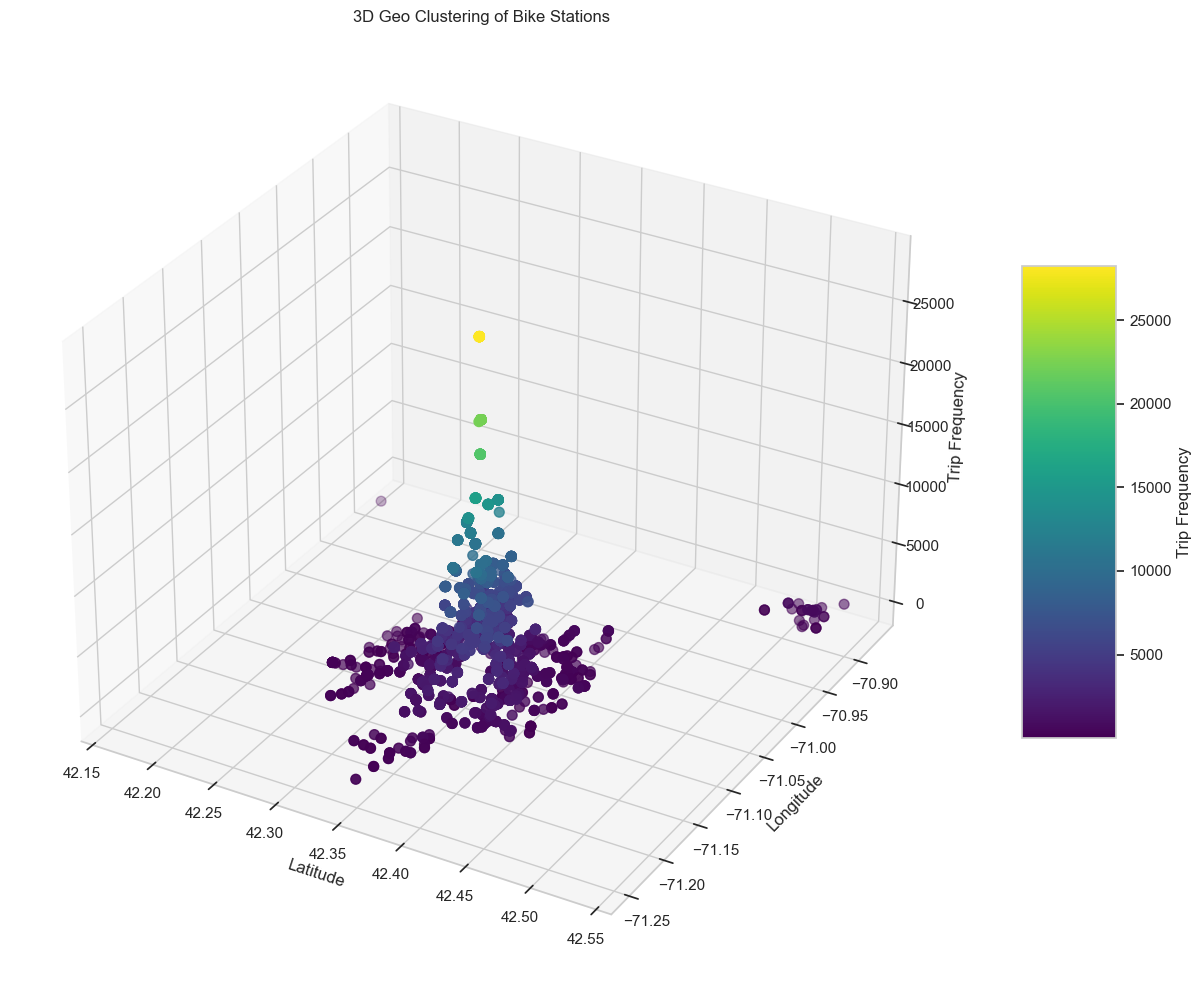

In [44]:
from mpl_toolkits.mplot3d import Axes3D

# Calculating trip frequency for each station
trip_frequency = df.groupby(['start_station_name'])['ride_id'].count().reset_index(name='trip_frequency')

# Merging the trip frequency back onto the main DataFrame to associate with lat/lng
df = df.merge(trip_frequency, on='start_station_name', how='left')

# Now create a DataFrame for stations with latitude, longitude, and trip frequency
# We use .drop_duplicates() because there will be multiple entries for each station
stations_with_frequency = df[['start_station_name', 'start_lat', 'start_lng', 'trip_frequency']].drop_duplicates()

# Increasing the figure size
fig = plt.figure(figsize=(14, 10))  # Width, Height in inches
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for latitude, longitude, and trip frequency with larger point size
# and a color map that reflects the trip frequency
sc = ax.scatter(stations_with_frequency['start_lat'], 
                stations_with_frequency['start_lng'], 
                stations_with_frequency['trip_frequency'],
                c=stations_with_frequency['trip_frequency'],  # Color by trip frequency
                cmap='viridis',  # Color map
                s=50)  # Point size

# Adding a color bar
cbar = plt.colorbar(sc, shrink=0.5, aspect=5)
cbar.set_label('Trip Frequency')

# Labels and titles
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Trip Frequency')
plt.title('3D Geo Clustering of Bike Stations')

# Enhancing the plot aesthetics
ax.grid(True)  
plt.tight_layout()  

# Showing the plot
plt.show()



In [43]:
# df.drop(['trip_frequency_x',
#        'trip_frequency_y',], inplace=True, axis=1)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305701 entries, 0 to 1305700
Data columns (total 25 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   ride_id             1305701 non-null  object        
 1   rideable_type       1305701 non-null  object        
 2   started_at          1305701 non-null  datetime64[ns]
 3   ended_at            1305701 non-null  datetime64[ns]
 4   duration_minutes    1305701 non-null  float64       
 5   trip_distance       1305701 non-null  float64       
 6   start_station_id    1305701 non-null  object        
 7   start_station_name  1305701 non-null  object        
 8   end_station_name    1305701 non-null  object        
 9   end_station_id      1305701 non-null  object        
 10  start_lat           1305701 non-null  float64       
 11  start_lng           1305701 non-null  float64       
 12  end_lat             1305701 non-null  float64       
 13  end_lng     

1. **Axes Information**: The x-axis shows the latitude, the y-axis shows the longitude, and the z-axis represents trip frequency. These dimensions suggest that each point in the plot corresponds to a bike station's geographical location and its usage intensity.

2. **Clustering**: Points are clustered according to geographical proximity, with denser clusters likely indicating areas with higher numbers of bike stations or areas with higher usage.

4. **Spatial Distribution**: There is a noticeable concentration of bike stations within a specific latitude and longitude range, which correspond to the **Backbay, Fenway-Kenmore, Boston's downtown, Somerville and the Cambridge area.**

5. **Outliers**: There are a few bike stations positioned away from the main cluster, which are in the suburbs of Boston such as **Everett, Revere, Malden, Hydepark, and Dorchester.**

6. **Trip Frequency**: Most bike stations have a relatively low to moderate trip frequency, with a few stations showing very high usage. These high-frequency stations are located at strategic points, like major public areas, transit hubs, or commercial centers.

7. **Analysis Focus**: For our project, stations with higher trip frequencies (warmer colors) would be of particular interest, as optimizing their placement could have a more significant impact on overall service efficiency.

### **In terms of your project's next steps, we  want to investigate the characteristics of the high-frequency stations to understand why they are popular and determine if additional stations are needed in those areas. Similarly, examining the low-frequency stations could reveal if they are poorly placed or if there are other factors influencing their low usage.**

 >> ### **Filtering Dataset based on trip frequency , Removing the stations with trip frequency <=5000. i.e. The number of trip's that originate from a start station are less than 5000**

In [62]:
filtered_df = df[df['trip_frequency'] > 5000]

In [64]:
filtered_df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'duration_minutes', 'trip_distance', 'start_station_id',
       'start_station_name', 'end_station_name', 'end_station_id', 'start_lat',
       'start_lng', 'end_lat', 'end_lng', 'season', 'AvgTemp', 'member_casual',
       'start_hour', 'end_hour', 'start_day', 'start_month',
       'start_day_of_week', 'hour_of_day', 'day_of_week', 'trip_frequency'],
      dtype='object')

In [69]:
filtered_df.drop(['hour_of_day', 'day_of_week'], inplace=True, axis = 1)

/var/folders/jb/rytm79zx10zcs2wb4zr2ptxr0000gn/T/ipykernel_81730/2265840824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(['hour_of_day', 'day_of_week'], inplace=True, axis = 1)


In [70]:
filtered_df

,ride_id,rideable_type,started_at,ended_at,duration_minutes,trip_distance,start_station_id,start_station_name,end_station_name,end_station_id,...,end_lng,season,AvgTemp,member_casual,start_hour,end_hour,start_day,start_month,start_day_of_week,trip_frequency
16,85A52A54DC77E832,docked_bike,2023-04-13 17:55:22,2023-04-13 18:09:57,14.583333,1.877944,M32055,Harvard St at Greene-Rose Heritage Park,Lesley University,M32039,...,-71.119019,spring,68.5,member,17,17,3,4,Thursday,5760
17,17A0784E0EAE3DE2,docked_bike,2023-04-27 17:26:03,2023-04-27 17:42:33,16.500000,1.329318,M32026,359 Broadway - Broadway at Fayette Street,Lesley University,M32039,...,-71.119019,spring,50.5,member,17,17,3,4,Thursday,5832
22,898C9A7B7C01D1CE,docked_bike,2023-04-13 20:09:14,2023-04-13 20:16:01,6.783333,0.328890,M32055,Harvard St at Greene-Rose Heritage Park,Mass Ave at Albany St,M32061,...,-71.096703,spring,68.5,member,20,20,3,4,Thursday,5760
23,0C3C85353AC1D0A0,docked_bike,2023-04-22 18:43:04,2023-04-22 19:05:06,22.033333,2.772623,M32026,359 Broadway - Broadway at Fayette Street,Lewis Wharf at Atlantic Ave,D32006,...,-71.050877,spring,48.0,member,18,18,5,4,Saturday,5832
24,427BDC3864BACB22,docked_bike,2023-04-29 12:52:25,2023-04-29 12:59:52,7.450000,0.761536,M32026,359 Broadway - Broadway at Fayette Street,Mass Ave at Albany St,M32061,...,-71.096703,spring,50.0,member,12,12,5,4,Saturday,5832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305569,5715442AE6B59F9F,classic_bike,2023-12-08 07:47:37,2023-12-08 07:57:03,9.433333,1.188867,A32025,Nashua Street at Red Auerbach Way,Stuart St at Berkeley St,D32049,...,-71.072421,winter,34.5,member,7,7,4,12,Friday,6372
1305570,A0792D35A364FC36,classic_bike,2023-12-10 21:48:12,2023-12-10 21:54:38,6.433333,0.765234,A32002,Commonwealth Ave at Agganis Way,Park Dr at Buswell St,A32008,...,-71.105301,winter,53.0,member,21,21,6,12,Sunday,10754
1305571,FD56933EA9FEEA63,classic_bike,2023-12-10 11:10:49,2023-12-10 11:20:11,9.366667,0.765234,A32002,Commonwealth Ave at Agganis Way,Park Dr at Buswell St,A32008,...,-71.105301,winter,53.0,member,11,11,6,12,Sunday,10754
1305573,94A5706C077F4347,classic_bike,2023-12-09 18:01:34,2023-12-09 18:21:52,20.300000,1.829355,A32002,Commonwealth Ave at Agganis Way,Inman Square at Springfield St.,M32062,...,-71.100265,winter,42.5,member,18,18,5,12,Saturday,10754


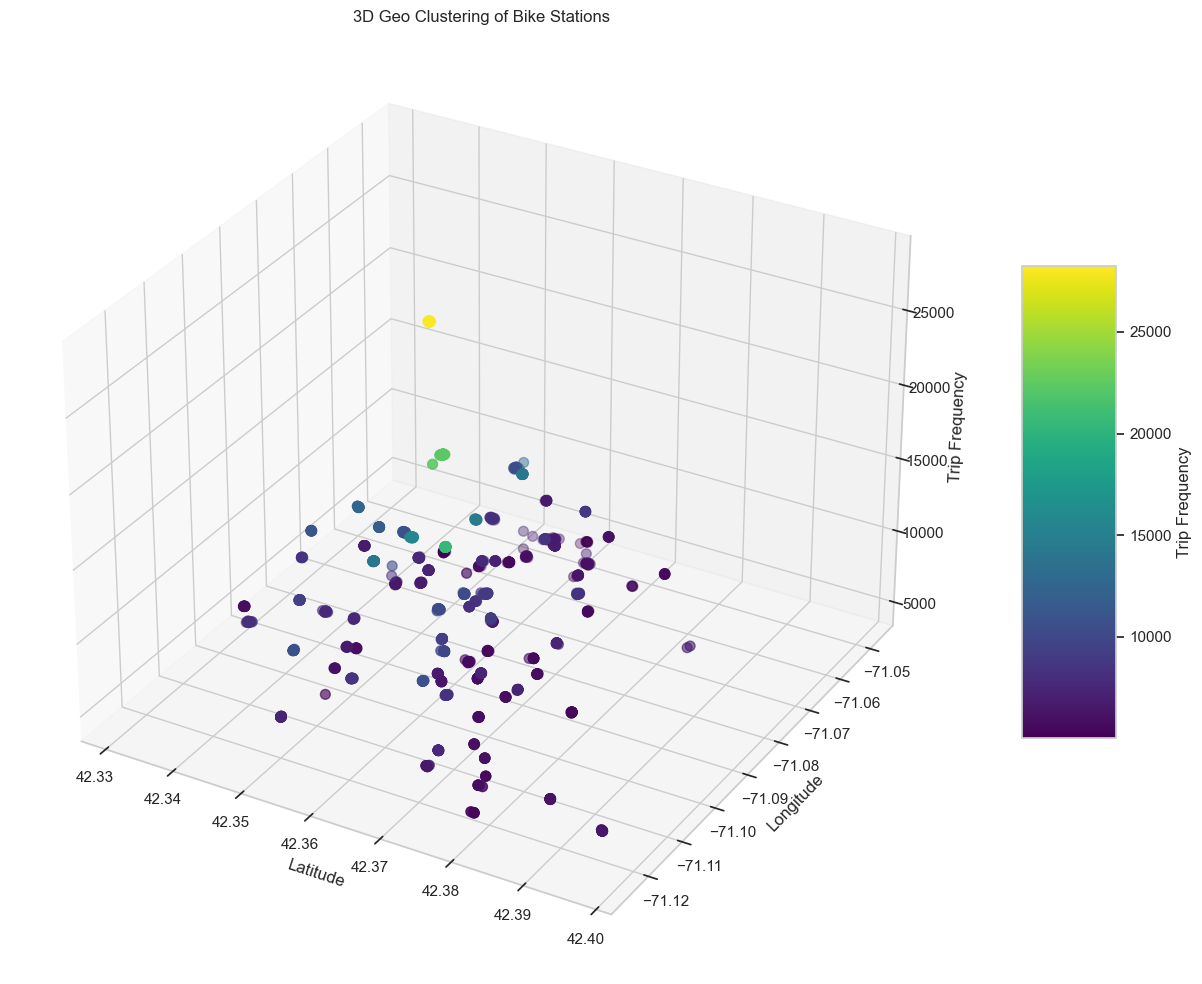

In [71]:
stations_with_frequency_more_than_5000 = filtered_df[['start_station_name', 'start_lat', 'start_lng', 'trip_frequency']].drop_duplicates()

# Increasing the figure size
fig = plt.figure(figsize=(14, 10))  # Width, Height in inches
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for latitude, longitude, and trip frequency with larger point size
# and a color map that reflects the trip frequency
sc = ax.scatter(stations_with_frequency_more_than_5000['start_lat'], 
                stations_with_frequency_more_than_5000['start_lng'], 
                stations_with_frequency_more_than_5000['trip_frequency'],
                c=stations_with_frequency_more_than_5000['trip_frequency'],  # Color by trip frequency
                cmap='viridis',  # Color map
                s=50)  # Point size

# Adding a color bar
cbar = plt.colorbar(sc, shrink=0.5, aspect=5)
cbar.set_label('Trip Frequency')

# Labels and titles
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Trip Frequency')
plt.title('3D Geo Clustering of Bike Stations')

# Enhancing the plot aesthetics
ax.grid(True)  
plt.tight_layout()  

# Showing the plot
plt.show()

### **We can see the data is much better represented now, as the data is spread out and these points can give valuabel information when we apply DBSCAN / HDBSCAN on this data**

**Strategic Placement Considerations: The stations shown in yellow or green, indicating the highest usage, could be critical nodes in the bike-sharing network. These stations might benefit from additional resources, such as more bikes or better infrastructure.**

In [72]:
# Create a map centered around Boston
map_boston = folium.Map(location=[42.3601, -71.0589], zoom_start=13)

# Heatmap for start stations
start_coords = filtered_df[['start_lat', 'start_lng']].dropna()
HeatMap(data=start_coords, radius=15).add_to(map_boston)

# Heatmap for end stations
end_coords = filtered_df[['end_lat', 'end_lng']].dropna()
HeatMap(data=end_coords, radius=15).add_to(map_boston)

# Display the map
map_boston.save('filtered_boston_bike_stations_heatmap.html')

### **Filtering for trip frequency being greater than 10,000 to see if we get a better representatiion of our data ?**

In [73]:
filtered_df_10k = df[df['trip_frequency'] > 10000]

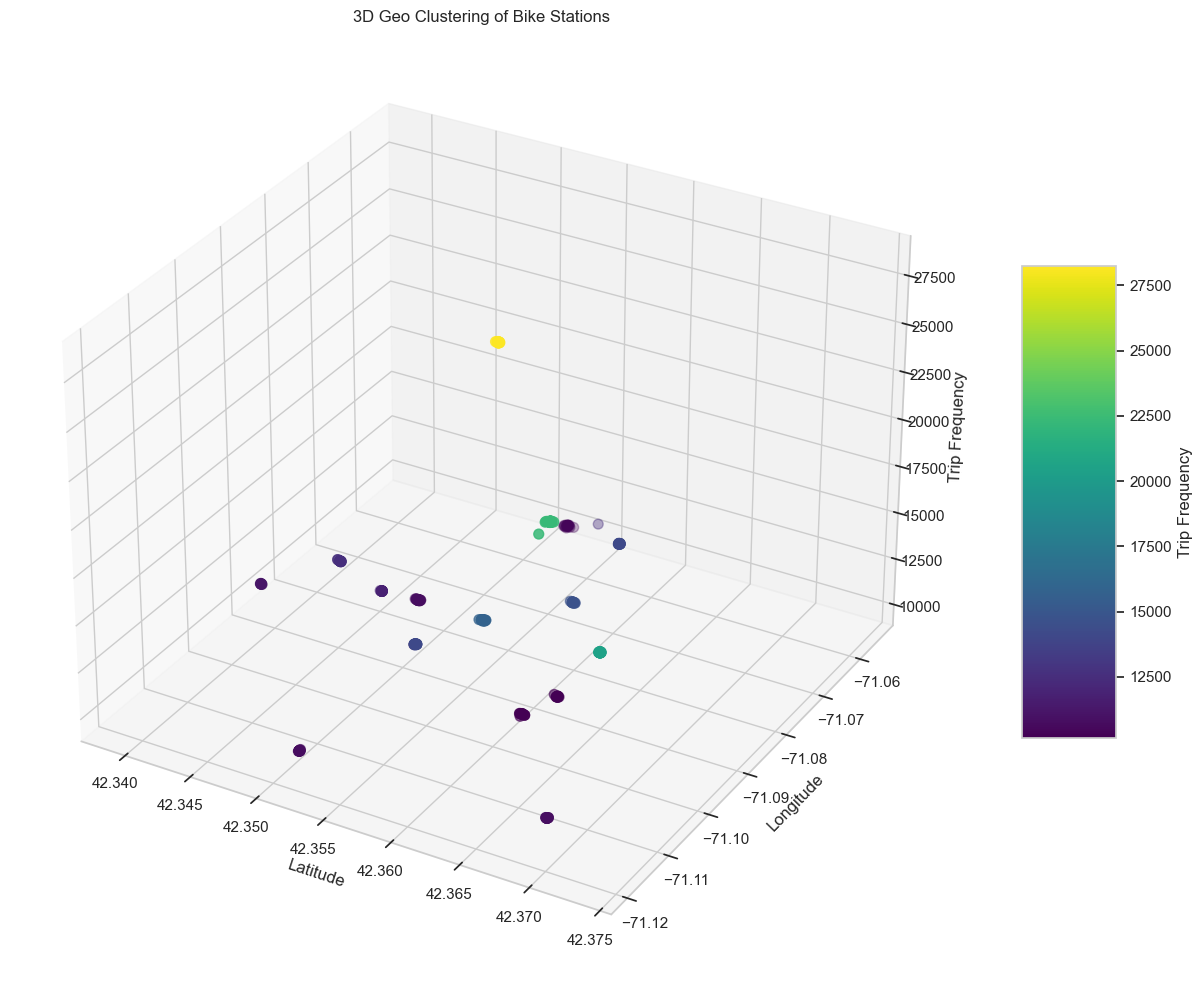

In [74]:
stations_with_frequency_more_than_10000 = filtered_df_10k[['start_station_name', 'start_lat', 'start_lng', 'trip_frequency']].drop_duplicates()

# Increasing the figure size
fig = plt.figure(figsize=(14, 10))  # Width, Height in inches
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for latitude, longitude, and trip frequency with larger point size
# and a color map that reflects the trip frequency
sc = ax.scatter(stations_with_frequency_more_than_10000['start_lat'], 
                stations_with_frequency_more_than_10000['start_lng'], 
                stations_with_frequency_more_than_10000['trip_frequency'],
                c=stations_with_frequency_more_than_10000['trip_frequency'],  # Color by trip frequency
                cmap='viridis',  # Color map
                s=50)  # Point size

# Adding a color bar
cbar = plt.colorbar(sc, shrink=0.5, aspect=5)
cbar.set_label('Trip Frequency')

# Labels and titles
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Trip Frequency')
plt.title('3D Geo Clustering of Bike Stations')

# Enhancing the plot aesthetics
ax.grid(True)  
plt.tight_layout()  

# Showing the plot
plt.show()

In [75]:
# Create a map centered around Boston
map_boston = folium.Map(location=[42.3601, -71.0589], zoom_start=13)

# Heatmap for start stations
start_coords = filtered_df_10k[['start_lat', 'start_lng']].dropna()
HeatMap(data=start_coords, radius=15).add_to(map_boston)

# Heatmap for end stations
end_coords = filtered_df_10k[['end_lat', 'end_lng']].dropna()
HeatMap(data=end_coords, radius=15).add_to(map_boston)

# Display the map
map_boston.save('filtered_10k_boston_bike_stations_heatmap.html')

### **We can see that a lot of data is lost when we filter for trip frequency > 10000, so we stick to the trip frequency being greater than 5000 for our clustering**